### 1. 라이브러리 선언및 데이터 불러오기 (타입통합/숫자컬럼추가)

In [2]:
# 라이브러리 정의 import tensorflow.keras
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [3]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")
featuresData.dtypes
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442


In [4]:
from sklearn.preprocessing import LabelEncoder
le_yn = LabelEncoder()


In [5]:
featuresData["LE_PROMO"] = le_yn.fit_transform(featuresData.PROMOTION)
featuresData["LE_HORI"] = le_yn.fit_transform(featuresData.HOLIDAY)

In [6]:
le_yn.inverse_transform(featuresData.LE_PROMO)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N'], dtype=object)

In [7]:
featuresData.head(4)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_PROMO,LE_HORI
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1


### 특성전정

In [8]:
# features = list(featuresData.select_dtypes(np.number).columns)
# features
label = ['QTY']
# features= list(set(featuresData.select_dtypes(np.number).columns) - set(label))
# features

In [9]:
corrdf = featuresData.corr()

In [10]:
features = list(corrdf[(abs(corrdf.QTY) > 0.5) & (corrdf.QTY <1)].index)

In [11]:
features

['HCLUS', 'PRO_PERCENT', 'LE_PROMO', 'LE_HORI']

In [12]:
stdIndex= int(len(featuresData)*0.8)

In [13]:
stdYearweek = featuresData.loc[stdIndex,"YEARWEEK"]
stdYearweek

201633

In [14]:
trainingData_features = featuresData[featuresData.YEARWEEK <= stdYearweek ][features]
trainingData_label = featuresData[featuresData.YEARWEEK <= stdYearweek ][label]
testData_features = featuresData[featuresData.YEARWEEK > stdYearweek ][features]
testData_label= featuresData[featuresData.YEARWEEK > stdYearweek ][label]
testData_all = featuresData[featuresData.YEARWEEK > stdYearweek]

In [15]:
print(len(trainingData_features), len(trainingData_label), len(testData_features), len(testData_label),len(testData_all))

86 86 21 21 21


In [16]:
testData_label.head()

,QTY
86,1700
87,1514
88,1501
89,1491
90,806


### 모델생성

In [26]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [27]:
inputDim = trainingData_features.loc[0,:].shape
inputDim

(4,)

### 모델선언

In [28]:
model = Sequential()

In [29]:
model.add(Dense(units=8, activation="relu",input_shape=inputDim))

In [30]:
model.add(Dense(units=8, activation="relu"))

In [31]:
model.add(Dense(units=1, activation="relu"))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.utils import plot_model

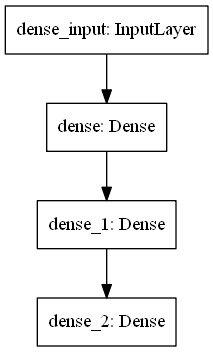

In [34]:
plot_model(model)

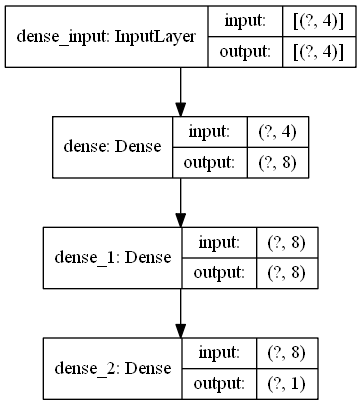

In [25]:
plot_model(model,show_layer_names=True, show_shapes=True)

### 모델 컴파일(훈련 준비 전단계)

In [35]:
from tensorflow.keras import optimizers

In [36]:
model.compile(loss='mean_squared_error', optimizer = optimizers.Adam(), metrics=['mean_squared_error','mean_absolute_error'])
#model.compile(loss="mean_squared_error", optimizers = "adam", metrics=["mean_squared_error","mean_absolute_error"])

#optimizer = keras.optimizers.RMSprop(0.001)
# optimizer = keras.optimizers.Adam()
# model.compile(loss='mean_squared_error',
#                 optimizer=optimizer,
#                 metrics=['mean_absolute_error','mean_squared_error'])


In [37]:
#callback List를 만들기 위한 선언 및 변수 설정
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from datetime import datetime
import os

log_folder = datetime.now().strftime("%Y%m%d_%H%M%S")



log_dirs = os.path.join("logs",log_folder)
log_dirs

'logs\\20191015_145409'

In [38]:
callback_list = [
    TensorBoard(log_dir = log_dirs),
    EarlyStopping(monitor="val_loss", patience=10), 
    ModelCheckpoint(filepath="./model_r_weights.h5", monitor="val_loss", verbose=1, save_best_only=True)   
]

In [39]:
model.fit(x=trainingData_features,
          y=trainingData_label,
          batch_size=32,
          epochs=2000,
          validation_split=0.2,
          callbacks=callback_list)

W1015 14:54:12.763252 15840 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 68 samples, validate on 18 samples
Epoch 1/2000
32/68 [=============>................] - ETA: 0s - loss: 1344209.2500 - mean_squared_error: 1344209.2500 - mean_absolute_error: 1016.7117
Epoch 00001: val_loss improved from inf to 1948912.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 3ms/sample - loss: 1926240.8971 - mean_squared_error: 1926241.0000 - mean_absolute_error: 1107.7406 - val_loss: 1948912.8750 - val_mean_squared_error: 1948912.8750 - val_mean_absolute_error: 1160.8413
Epoch 2/2000
32/68 [=============>................] - ETA: 0s - loss: 2377378.5000 - mean_squared_error: 2377378.5000 - mean_absolute_error: 1222.1818
Epoch 00002: val_loss improved from 1948912.87500 to 1948850.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 447us/sample - loss: 1926172.6176 - mean_squared_error: 1926172.6250 - mean_absolute_error: 1107.6956 - val_loss: 1948850.2500 - val_mean_squared_error: 1948850.2500

32/68 [=============>................] - ETA: 0s - loss: 2083196.3750 - mean_squared_error: 2083196.3750 - mean_absolute_error: 1224.0861
Epoch 00017: val_loss improved from 1947628.25000 to 1947492.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 1924901.0221 - mean_squared_error: 1924901.0000 - mean_absolute_error: 1106.9646 - val_loss: 1947492.0000 - val_mean_squared_error: 1947492.0000 - val_mean_absolute_error: 1160.1201
Epoch 18/2000
32/68 [=============>................] - ETA: 0s - loss: 2156258.0000 - mean_squared_error: 2156258.0000 - mean_absolute_error: 1193.5908
Epoch 00018: val_loss improved from 1947492.00000 to 1947356.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1924768.6397 - mean_squared_error: 1924768.6250 - mean_absolute_error: 1106.8989 - val_loss: 1947356.5000 - val_mean_squared_error: 1947356.5000 - val_mean_absolute_error: 1160.0568
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 1852680.5000 - mean_squared_error: 1852680.5000 - mean_absolute_error: 1142.2401
Epoch 00033: val_loss improved from 1945023.50000 to 1944821.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1922373.2647 - mean_squared_error: 1922373.2500 - mean_absolute_error: 1105.6935 - val_loss: 1944821.1250 - val_mean_squared_error: 1944821.1250 - val_mean_absolute_error: 1158.8749
Epoch 34/2000
32/68 [=============>................] - ETA: 0s - loss: 1218450.1250 - mean_squared_error: 1218450.1250 - mean_absolute_error: 969.2602
Epoch 00034: val_loss improved from 1944821.12500 to 1944612.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1922172.2941 - mean_squared_error: 1922172.3750 - mean_absolute_error: 1105.5951 - val_loss: 1944612.2500 - val_mean_squared_error: 1944612.2500 - val_mean_absolute_error: 1158.7778
Epoch 3

32/68 [=============>................] - ETA: 0s - loss: 1902288.1250 - mean_squared_error: 1902288.1250 - mean_absolute_error: 1094.3220
Epoch 00049: val_loss improved from 1940922.62500 to 1940598.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 1918430.4706 - mean_squared_error: 1918430.5000 - mean_absolute_error: 1103.7322 - val_loss: 1940598.8750 - val_mean_squared_error: 1940598.8750 - val_mean_absolute_error: 1156.9346
Epoch 50/2000
32/68 [=============>................] - ETA: 0s - loss: 1719777.7500 - mean_squared_error: 1719777.7500 - mean_absolute_error: 987.9124
Epoch 00050: val_loss improved from 1940598.87500 to 1940260.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1918116.0515 - mean_squared_error: 1918116.0000 - mean_absolute_error: 1103.5781 - val_loss: 1940260.5000 - val_mean_squared_error: 1940260.5000 - val_mean_absolute_error: 1156.7808
Epoch 5

32/68 [=============>................] - ETA: 0s - loss: 2367081.0000 - mean_squared_error: 2367081.0000 - mean_absolute_error: 1217.1566
Epoch 00065: val_loss improved from 1934452.87500 to 1933967.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 1912319.5423 - mean_squared_error: 1912319.6250 - mean_absolute_error: 1100.7726 - val_loss: 1933967.3750 - val_mean_squared_error: 1933967.3750 - val_mean_absolute_error: 1153.9641
Epoch 66/2000
32/68 [=============>................] - ETA: 0s - loss: 2160925.5000 - mean_squared_error: 2160925.5000 - mean_absolute_error: 1154.5330
Epoch 00066: val_loss improved from 1933967.37500 to 1933486.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1911855.8346 - mean_squared_error: 1911855.8750 - mean_absolute_error: 1100.5531 - val_loss: 1933486.5000 - val_mean_squared_error: 1933486.5000 - val_mean_absolute_error: 1153.7487
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 2091521.7500 - mean_squared_error: 2091521.7500 - mean_absolute_error: 1174.9421
Epoch 00081: val_loss improved from 1925265.12500 to 1924605.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 1903703.2261 - mean_squared_error: 1903703.1250 - mean_absolute_error: 1096.6740 - val_loss: 1924605.1250 - val_mean_squared_error: 1924605.1250 - val_mean_absolute_error: 1149.8295
Epoch 82/2000
32/68 [=============>................] - ETA: 0s - loss: 1340449.0000 - mean_squared_error: 1340449.0000 - mean_absolute_error: 937.5583
Epoch 00082: val_loss improved from 1924605.12500 to 1923954.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1903061.8272 - mean_squared_error: 1903061.8750 - mean_absolute_error: 1096.3868 - val_loss: 1923954.2500 - val_mean_squared_error: 1923954.2500 - val_mean_absolute_error: 1149.5458
Epoch 8

Epoch 98/2000
32/68 [=============>................] - ETA: 0s - loss: 2425707.5000 - mean_squared_error: 2425707.5000 - mean_absolute_error: 1183.3552
Epoch 00098: val_loss improved from 1910385.75000 to 1909164.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 1889822.9559 - mean_squared_error: 1889823.0000 - mean_absolute_error: 1090.3900 - val_loss: 1909164.8750 - val_mean_squared_error: 1909164.8750 - val_mean_absolute_error: 1143.2620
Epoch 99/2000
32/68 [=============>................] - ETA: 0s - loss: 2051008.2500 - mean_squared_error: 2051008.2500 - mean_absolute_error: 1120.3511
Epoch 00099: val_loss improved from 1909164.87500 to 1907931.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1888701.2721 - mean_squared_error: 1888701.2500 - mean_absolute_error: 1089.9014 - val_loss: 1907931.7500 - val_mean_squared_error: 1907931.7500 - val_mean_absolute_error: 11

32/68 [=============>................] - ETA: 0s - loss: 2442511.7500 - mean_squared_error: 2442511.7500 - mean_absolute_error: 1210.5901
Epoch 00114: val_loss improved from 1888489.12500 to 1886924.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1869746.5000 - mean_squared_error: 1869746.5000 - mean_absolute_error: 1081.6635 - val_loss: 1886924.2500 - val_mean_squared_error: 1886924.2500 - val_mean_absolute_error: 1134.4116
Epoch 115/2000
32/68 [=============>................] - ETA: 0s - loss: 1911685.1250 - mean_squared_error: 1911685.1250 - mean_absolute_error: 1108.5277
Epoch 00115: val_loss improved from 1886924.25000 to 1885342.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1868277.6765 - mean_squared_error: 1868277.6250 - mean_absolute_error: 1081.0234 - val_loss: 1885342.2500 - val_mean_squared_error: 1885342.2500 - val_mean_absolute_error: 1133.7915
Epoch

32/68 [=============>................] - ETA: 0s - loss: 1680285.2500 - mean_squared_error: 1680285.2500 - mean_absolute_error: 976.3167
Epoch 00130: val_loss improved from 1858833.50000 to 1856613.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 1842317.4375 - mean_squared_error: 1842317.3750 - mean_absolute_error: 1069.2839 - val_loss: 1856613.5000 - val_mean_squared_error: 1856613.5000 - val_mean_absolute_error: 1122.4349
Epoch 131/2000
32/68 [=============>................] - ETA: 0s - loss: 1698931.7500 - mean_squared_error: 1698931.7500 - mean_absolute_error: 1046.8158
Epoch 00131: val_loss improved from 1856613.50000 to 1854344.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 1840260.4118 - mean_squared_error: 1840260.5000 - mean_absolute_error: 1068.3198 - val_loss: 1854344.2500 - val_mean_squared_error: 1854344.2500 - val_mean_absolute_error: 1121.5237
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 1828065.6250 - mean_squared_error: 1828065.6250 - mean_absolute_error: 1128.1648
Epoch 00146: val_loss improved from 1817947.75000 to 1815015.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 425us/sample - loss: 1804477.1176 - mean_squared_error: 1804477.1250 - mean_absolute_error: 1051.6028 - val_loss: 1815015.7500 - val_mean_squared_error: 1815015.7500 - val_mean_absolute_error: 1107.1508
Epoch 147/2000
32/68 [=============>................] - ETA: 0s - loss: 1809742.5000 - mean_squared_error: 1809742.5000 - mean_absolute_error: 1091.3484
Epoch 00147: val_loss improved from 1815015.75000 to 1812086.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 425us/sample - loss: 1801786.4191 - mean_squared_error: 1801786.5000 - mean_absolute_error: 1050.3407 - val_loss: 1812086.5000 - val_mean_squared_error: 1812086.5000 - val_mean_absolute_error: 1106.0997
Epoch

32/68 [=============>................] - ETA: 0s - loss: 1107701.5000 - mean_squared_error: 1107701.5000 - mean_absolute_error: 868.0481
Epoch 00162: val_loss improved from 1767186.00000 to 1763914.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1757621.6213 - mean_squared_error: 1757621.6250 - mean_absolute_error: 1029.9243 - val_loss: 1763914.1250 - val_mean_squared_error: 1763914.1250 - val_mean_absolute_error: 1088.6637
Epoch 163/2000
32/68 [=============>................] - ETA: 0s - loss: 2308053.2500 - mean_squared_error: 2308053.2500 - mean_absolute_error: 1156.5308
Epoch 00163: val_loss improved from 1763914.12500 to 1760634.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1754683.0735 - mean_squared_error: 1754683.0000 - mean_absolute_error: 1028.5189 - val_loss: 1760634.0000 - val_mean_squared_error: 1760634.0000 - val_mean_absolute_error: 1087.6244
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 1867075.0000 - mean_squared_error: 1867075.0000 - mean_absolute_error: 1011.0518
Epoch 00178: val_loss improved from 1707081.75000 to 1703100.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1702267.2206 - mean_squared_error: 1702267.1250 - mean_absolute_error: 1003.5284 - val_loss: 1703100.5000 - val_mean_squared_error: 1703100.5000 - val_mean_absolute_error: 1070.4043
Epoch 179/2000
32/68 [=============>................] - ETA: 0s - loss: 1684953.0000 - mean_squared_error: 1684953.0000 - mean_absolute_error: 1028.8379
Epoch 00179: val_loss improved from 1703100.50000 to 1699062.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1698662.9044 - mean_squared_error: 1698663.0000 - mean_absolute_error: 1001.7791 - val_loss: 1699062.7500 - val_mean_squared_error: 1699062.7500 - val_mean_absolute_error: 1069.2977
Epoch

Epoch 00194: val_loss improved from 1639509.87500 to 1634892.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 1640403.3529 - mean_squared_error: 1640403.3750 - mean_absolute_error: 973.2448 - val_loss: 1634892.0000 - val_mean_squared_error: 1634892.0000 - val_mean_absolute_error: 1051.3678
Epoch 195/2000
32/68 [=============>................] - ETA: 0s - loss: 1373950.7500 - mean_squared_error: 1373950.7500 - mean_absolute_error: 935.0703
Epoch 00195: val_loss improved from 1634892.00000 to 1630232.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1636094.4412 - mean_squared_error: 1636094.5000 - mean_absolute_error: 971.1849 - val_loss: 1630232.2500 - val_mean_squared_error: 1630232.2500 - val_mean_absolute_error: 1050.0442
Epoch 196/2000
32/68 [=============>................] - ETA: 0s - loss: 1788273.0000 - mean_squared_error: 1788273.0000 - mean_absolute_error: 100

Epoch 211/2000
32/68 [=============>................] - ETA: 0s - loss: 2161600.0000 - mean_squared_error: 2161600.0000 - mean_absolute_error: 1051.1206
Epoch 00211: val_loss improved from 1560979.62500 to 1556205.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1568839.4081 - mean_squared_error: 1568839.3750 - mean_absolute_error: 938.6411 - val_loss: 1556205.1250 - val_mean_squared_error: 1556205.1250 - val_mean_absolute_error: 1028.5333
Epoch 212/2000
32/68 [=============>................] - ETA: 0s - loss: 2022243.7500 - mean_squared_error: 2022243.7500 - mean_absolute_error: 1018.7386
Epoch 00212: val_loss improved from 1556205.12500 to 1551387.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 1564444.3088 - mean_squared_error: 1564444.3750 - mean_absolute_error: 936.4572 - val_loss: 1551387.7500 - val_mean_squared_error: 1551387.7500 - val_mean_absolute_error: 10

32/68 [=============>................] - ETA: 0s - loss: 1796862.0000 - mean_squared_error: 1796862.0000 - mean_absolute_error: 956.4254
Epoch 00227: val_loss improved from 1476568.12500 to 1471584.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 440us/sample - loss: 1492366.6765 - mean_squared_error: 1492366.7500 - mean_absolute_error: 900.0703 - val_loss: 1471584.8750 - val_mean_squared_error: 1471584.8750 - val_mean_absolute_error: 1002.8036
Epoch 228/2000
32/68 [=============>................] - ETA: 0s - loss: 919974.8750 - mean_squared_error: 919974.8750 - mean_absolute_error: 743.9556
Epoch 00228: val_loss improved from 1471584.87500 to 1466799.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 1487772.9890 - mean_squared_error: 1487773.0000 - mean_absolute_error: 897.9037 - val_loss: 1466799.3750 - val_mean_squared_error: 1466799.3750 - val_mean_absolute_error: 1001.3137
Epoch 229/2

68/68 [==============================] - 0s 308us/sample - loss: 1419190.5588 - mean_squared_error: 1419190.5000 - mean_absolute_error: 863.3171 - val_loss: 1390283.1250 - val_mean_squared_error: 1390283.1250 - val_mean_absolute_error: 976.8948
Epoch 244/2000
32/68 [=============>................] - ETA: 0s - loss: 1566929.2500 - mean_squared_error: 1566929.2500 - mean_absolute_error: 952.0363
Epoch 00244: val_loss improved from 1390283.12500 to 1385298.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 1414705.1949 - mean_squared_error: 1414705.1250 - mean_absolute_error: 861.1053 - val_loss: 1385298.8750 - val_mean_squared_error: 1385298.8750 - val_mean_absolute_error: 975.2595
Epoch 245/2000
32/68 [=============>................] - ETA: 0s - loss: 1885535.7500 - mean_squared_error: 1885535.7500 - mean_absolute_error: 1012.3809
Epoch 00245: val_loss improved from 1385298.87500 to 1380306.25000, saving model to ./model_r_weight

Epoch 260/2000
32/68 [=============>................] - ETA: 0s - loss: 1217428.2500 - mean_squared_error: 1217428.2500 - mean_absolute_error: 831.0781
Epoch 00260: val_loss improved from 1310110.50000 to 1304519.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 440us/sample - loss: 1342897.4926 - mean_squared_error: 1342897.5000 - mean_absolute_error: 824.3565 - val_loss: 1304519.5000 - val_mean_squared_error: 1304519.5000 - val_mean_absolute_error: 947.9519
Epoch 261/2000
32/68 [=============>................] - ETA: 0s - loss: 910325.2500 - mean_squared_error: 910325.2500 - mean_absolute_error: 767.5343
Epoch 00261: val_loss improved from 1304519.50000 to 1298924.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1337863.6618 - mean_squared_error: 1337863.6250 - mean_absolute_error: 821.8218 - val_loss: 1298924.2500 - val_mean_squared_error: 1298924.2500 - val_mean_absolute_error: 945.994

68/68 [==============================] - 0s 367us/sample - loss: 1262545.1029 - mean_squared_error: 1262545.0000 - mean_absolute_error: 783.0178 - val_loss: 1213829.3750 - val_mean_squared_error: 1213829.3750 - val_mean_absolute_error: 915.1656
Epoch 277/2000
32/68 [=============>................] - ETA: 0s - loss: 1330052.7500 - mean_squared_error: 1330052.7500 - mean_absolute_error: 800.6702
Epoch 00277: val_loss improved from 1213829.37500 to 1208181.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1257663.6857 - mean_squared_error: 1257663.6250 - mean_absolute_error: 780.2900 - val_loss: 1208181.5000 - val_mean_squared_error: 1208181.5000 - val_mean_absolute_error: 913.0431
Epoch 278/2000
32/68 [=============>................] - ETA: 0s - loss: 1041164.0000 - mean_squared_error: 1041164.0000 - mean_absolute_error: 731.9799
Epoch 00278: val_loss improved from 1208181.50000 to 1202728.87500, saving model to ./model_r_weights

Epoch 293/2000
32/68 [=============>................] - ETA: 0s - loss: 1573453.5000 - mean_squared_error: 1573453.5000 - mean_absolute_error: 848.4196
Epoch 00293: val_loss improved from 1129746.00000 to 1124929.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 1184327.4301 - mean_squared_error: 1184327.5000 - mean_absolute_error: 744.3610 - val_loss: 1124929.8750 - val_mean_squared_error: 1124929.8750 - val_mean_absolute_error: 887.1061
Epoch 294/2000
32/68 [=============>................] - ETA: 0s - loss: 1078275.1250 - mean_squared_error: 1078275.1250 - mean_absolute_error: 780.3729
Epoch 00294: val_loss improved from 1124929.87500 to 1120253.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1180176.9472 - mean_squared_error: 1180177.0000 - mean_absolute_error: 742.1687 - val_loss: 1120253.1250 - val_mean_squared_error: 1120253.1250 - val_mean_absolute_error: 885.6

68/68 [==============================] - 0s 323us/sample - loss: 1122180.1471 - mean_squared_error: 1122180.1250 - mean_absolute_error: 717.0077 - val_loss: 1053610.1250 - val_mean_squared_error: 1053610.1250 - val_mean_absolute_error: 863.9202
Epoch 310/2000
32/68 [=============>................] - ETA: 0s - loss: 1006531.3750 - mean_squared_error: 1006531.3750 - mean_absolute_error: 636.8561
Epoch 00310: val_loss improved from 1053610.12500 to 1049351.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 1118531.1471 - mean_squared_error: 1118531.1250 - mean_absolute_error: 715.5216 - val_loss: 1049351.1250 - val_mean_squared_error: 1049351.1250 - val_mean_absolute_error: 862.8734
Epoch 311/2000
32/68 [=============>................] - ETA: 0s - loss: 1268899.8750 - mean_squared_error: 1268899.8750 - mean_absolute_error: 739.8731
Epoch 00311: val_loss improved from 1049351.12500 to 1044960.25000, saving model to ./model_r_weights

Epoch 326/2000
32/68 [=============>................] - ETA: 0s - loss: 946056.6875 - mean_squared_error: 946056.6875 - mean_absolute_error: 679.5649
Epoch 00326: val_loss improved from 984078.87500 to 979596.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1059333.8897 - mean_squared_error: 1059333.8750 - mean_absolute_error: 691.3171 - val_loss: 979596.0000 - val_mean_squared_error: 979596.0000 - val_mean_absolute_error: 845.0885
Epoch 327/2000
32/68 [=============>................] - ETA: 0s - loss: 1160891.8750 - mean_squared_error: 1160891.8750 - mean_absolute_error: 662.2410
Epoch 00327: val_loss improved from 979596.00000 to 974971.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1055567.1949 - mean_squared_error: 1055567.2500 - mean_absolute_error: 689.7204 - val_loss: 974971.2500 - val_mean_squared_error: 974971.2500 - val_mean_absolute_error: 843.8610
Epoch 

Epoch 343/2000
32/68 [=============>................] - ETA: 0s - loss: 834202.3125 - mean_squared_error: 834202.3125 - mean_absolute_error: 609.9382
Epoch 00343: val_loss improved from 914454.12500 to 910662.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1001089.9412 - mean_squared_error: 1001089.8750 - mean_absolute_error: 670.9495 - val_loss: 910662.8750 - val_mean_squared_error: 910662.8750 - val_mean_absolute_error: 825.4304
Epoch 344/2000
32/68 [=============>................] - ETA: 0s - loss: 883937.8125 - mean_squared_error: 883937.8125 - mean_absolute_error: 665.1882
Epoch 00344: val_loss improved from 910662.87500 to 906270.68750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 997954.2941 - mean_squared_error: 997954.2500 - mean_absolute_error: 669.7509 - val_loss: 906270.6875 - val_mean_squared_error: 906270.6875 - val_mean_absolute_error: 824.0853
Epoch 345/

Epoch 360/2000
32/68 [=============>................] - ETA: 0s - loss: 568066.3750 - mean_squared_error: 568066.3750 - mean_absolute_error: 567.5765
Epoch 00360: val_loss improved from 853034.50000 to 849805.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 950859.1544 - mean_squared_error: 950859.1875 - mean_absolute_error: 656.7213 - val_loss: 849805.7500 - val_mean_squared_error: 849805.7500 - val_mean_absolute_error: 805.6414
Epoch 361/2000
32/68 [=============>................] - ETA: 0s - loss: 1126437.0000 - mean_squared_error: 1126437.0000 - mean_absolute_error: 709.7328
Epoch 00361: val_loss improved from 849805.75000 to 846698.81250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 948322.0074 - mean_squared_error: 948322.0625 - mean_absolute_error: 656.0301 - val_loss: 846698.8125 - val_mean_squared_error: 846698.8125 - val_mean_absolute_error: 804.5369
Epoch 362/

Epoch 377/2000
32/68 [=============>................] - ETA: 0s - loss: 1120122.0000 - mean_squared_error: 1120122.0000 - mean_absolute_error: 690.7422
Epoch 00377: val_loss improved from 801183.75000 to 798284.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 909170.1884 - mean_squared_error: 909170.1875 - mean_absolute_error: 645.7450 - val_loss: 798284.3750 - val_mean_squared_error: 798284.3750 - val_mean_absolute_error: 786.5098
Epoch 378/2000
32/68 [=============>................] - ETA: 0s - loss: 1036548.6250 - mean_squared_error: 1036548.6250 - mean_absolute_error: 655.7417
Epoch 00378: val_loss improved from 798284.37500 to 795492.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 906685.8676 - mean_squared_error: 906685.8750 - mean_absolute_error: 645.0046 - val_loss: 795492.7500 - val_mean_squared_error: 795492.7500 - val_mean_absolute_error: 785.4135
Epoch 37

Epoch 394/2000
32/68 [=============>................] - ETA: 0s - loss: 469175.5938 - mean_squared_error: 469175.5938 - mean_absolute_error: 495.3589
Epoch 00394: val_loss improved from 749977.43750 to 747291.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 868497.8971 - mean_squared_error: 868497.8750 - mean_absolute_error: 635.8813 - val_loss: 747291.6250 - val_mean_squared_error: 747291.6250 - val_mean_absolute_error: 764.8842
Epoch 395/2000
32/68 [=============>................] - ETA: 0s - loss: 932300.4375 - mean_squared_error: 932300.4375 - mean_absolute_error: 617.3643
Epoch 00395: val_loss improved from 747291.62500 to 744691.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 866358.9412 - mean_squared_error: 866358.9375 - mean_absolute_error: 635.2031 - val_loss: 744691.7500 - val_mean_squared_error: 744691.7500 - val_mean_absolute_error: 763.6777
Epoch 396/20

Epoch 411/2000
32/68 [=============>................] - ETA: 0s - loss: 978914.2500 - mean_squared_error: 978914.2500 - mean_absolute_error: 677.6128
Epoch 00411: val_loss improved from 711750.25000 to 710112.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 279us/sample - loss: 838721.5588 - mean_squared_error: 838721.5000 - mean_absolute_error: 629.5278 - val_loss: 710112.1250 - val_mean_squared_error: 710112.1250 - val_mean_absolute_error: 747.3297
Epoch 412/2000
32/68 [=============>................] - ETA: 0s - loss: 538551.1875 - mean_squared_error: 538551.1875 - mean_absolute_error: 477.5369
Epoch 00412: val_loss improved from 710112.12500 to 708512.68750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 837294.6029 - mean_squared_error: 837294.6250 - mean_absolute_error: 629.2643 - val_loss: 708512.6875 - val_mean_squared_error: 708512.6875 - val_mean_absolute_error: 746.7021
Epoch 413/20

Epoch 428/2000
32/68 [=============>................] - ETA: 0s - loss: 970484.8750 - mean_squared_error: 970484.8750 - mean_absolute_error: 630.4806
Epoch 00428: val_loss improved from 680650.56250 to 678945.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 814313.3364 - mean_squared_error: 814313.3125 - mean_absolute_error: 627.3578 - val_loss: 678945.6250 - val_mean_squared_error: 678945.6250 - val_mean_absolute_error: 734.8882
Epoch 429/2000
32/68 [=============>................] - ETA: 0s - loss: 345971.8438 - mean_squared_error: 345971.8438 - mean_absolute_error: 469.4302
Epoch 00429: val_loss improved from 678945.62500 to 677189.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 812713.4118 - mean_squared_error: 812713.4375 - mean_absolute_error: 627.1362 - val_loss: 677189.8750 - val_mean_squared_error: 677189.8750 - val_mean_absolute_error: 734.1307
Epoch 430/20

Epoch 445/2000
32/68 [=============>................] - ETA: 0s - loss: 899928.2500 - mean_squared_error: 899928.2500 - mean_absolute_error: 712.2781
Epoch 00445: val_loss improved from 652327.25000 to 650987.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 791922.6471 - mean_squared_error: 791922.5625 - mean_absolute_error: 624.6569 - val_loss: 650987.2500 - val_mean_squared_error: 650987.2500 - val_mean_absolute_error: 721.9082
Epoch 446/2000
32/68 [=============>................] - ETA: 0s - loss: 613647.0625 - mean_squared_error: 613647.0625 - mean_absolute_error: 555.2416
Epoch 00446: val_loss improved from 650987.25000 to 649580.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 790731.1140 - mean_squared_error: 790731.1250 - mean_absolute_error: 624.3771 - val_loss: 649580.0000 - val_mean_squared_error: 649580.0000 - val_mean_absolute_error: 721.1634
Epoch 447/20

Epoch 462/2000
32/68 [=============>................] - ETA: 0s - loss: 393051.5938 - mean_squared_error: 393051.5938 - mean_absolute_error: 524.0140
Epoch 00462: val_loss improved from 631853.12500 to 630566.93750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 773580.8364 - mean_squared_error: 773580.8125 - mean_absolute_error: 618.8300 - val_loss: 630566.9375 - val_mean_squared_error: 630566.9375 - val_mean_absolute_error: 710.0701
Epoch 463/2000
32/68 [=============>................] - ETA: 0s - loss: 919072.0000 - mean_squared_error: 919072.0000 - mean_absolute_error: 661.5640
Epoch 00463: val_loss improved from 630566.93750 to 629419.68750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 279us/sample - loss: 772588.8401 - mean_squared_error: 772588.8125 - mean_absolute_error: 618.5208 - val_loss: 629419.6875 - val_mean_squared_error: 629419.6875 - val_mean_absolute_error: 709.3859
Epoch 464/20

Epoch 479/2000
32/68 [=============>................] - ETA: 0s - loss: 977769.5000 - mean_squared_error: 977769.5000 - mean_absolute_error: 678.3363
Epoch 00479: val_loss improved from 613034.93750 to 612283.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 756723.6121 - mean_squared_error: 756723.5625 - mean_absolute_error: 612.9673 - val_loss: 612283.0000 - val_mean_squared_error: 612283.0000 - val_mean_absolute_error: 698.8058
Epoch 480/2000
32/68 [=============>................] - ETA: 0s - loss: 610375.5000 - mean_squared_error: 610375.5000 - mean_absolute_error: 554.6033
Epoch 00480: val_loss improved from 612283.00000 to 611457.31250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 755888.3015 - mean_squared_error: 755888.3125 - mean_absolute_error: 612.5554 - val_loss: 611457.3125 - val_mean_squared_error: 611457.3125 - val_mean_absolute_error: 698.2476
Epoch 481/20

Epoch 496/2000
32/68 [=============>................] - ETA: 0s - loss: 1029253.8750 - mean_squared_error: 1029253.8750 - mean_absolute_error: 744.4391
Epoch 00496: val_loss improved from 595625.25000 to 594741.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 740192.9504 - mean_squared_error: 740192.9375 - mean_absolute_error: 606.9502 - val_loss: 594741.1250 - val_mean_squared_error: 594741.1250 - val_mean_absolute_error: 687.2948
Epoch 497/2000
32/68 [=============>................] - ETA: 0s - loss: 907983.6250 - mean_squared_error: 907983.6250 - mean_absolute_error: 700.6310
Epoch 00497: val_loss improved from 594741.12500 to 593856.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 739319.9890 - mean_squared_error: 739320.0000 - mean_absolute_error: 606.5909 - val_loss: 593856.6250 - val_mean_squared_error: 593856.6250 - val_mean_absolute_error: 686.6917
Epoch 498/

Epoch 513/2000
32/68 [=============>................] - ETA: 0s - loss: 634986.6250 - mean_squared_error: 634986.6250 - mean_absolute_error: 541.8057
Epoch 00513: val_loss improved from 576412.93750 to 575438.68750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 722788.5110 - mean_squared_error: 722788.5000 - mean_absolute_error: 601.6582 - val_loss: 575438.6875 - val_mean_squared_error: 575438.6875 - val_mean_absolute_error: 674.6812
Epoch 514/2000
32/68 [=============>................] - ETA: 0s - loss: 388805.4688 - mean_squared_error: 388805.4688 - mean_absolute_error: 515.8649
Epoch 00514: val_loss improved from 575438.68750 to 574510.81250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 425us/sample - loss: 721821.9265 - mean_squared_error: 721821.9375 - mean_absolute_error: 601.3047 - val_loss: 574510.8125 - val_mean_squared_error: 574510.8125 - val_mean_absolute_error: 674.0243
Epoch 515/20

Epoch 530/2000
32/68 [=============>................] - ETA: 0s - loss: 836382.0000 - mean_squared_error: 836382.0000 - mean_absolute_error: 660.6025
Epoch 00530: val_loss improved from 556804.93750 to 555711.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 704980.7436 - mean_squared_error: 704980.7500 - mean_absolute_error: 595.9412 - val_loss: 555711.8750 - val_mean_squared_error: 555711.8750 - val_mean_absolute_error: 661.0251
Epoch 531/2000
32/68 [=============>................] - ETA: 0s - loss: 670836.6875 - mean_squared_error: 670836.6875 - mean_absolute_error: 548.4565
Epoch 00531: val_loss improved from 555711.87500 to 554755.93750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 703851.9540 - mean_squared_error: 703852.0000 - mean_absolute_error: 595.5049 - val_loss: 554755.9375 - val_mean_squared_error: 554755.9375 - val_mean_absolute_error: 660.4750
Epoch 532/20

Epoch 547/2000
32/68 [=============>................] - ETA: 0s - loss: 424792.1875 - mean_squared_error: 424792.1875 - mean_absolute_error: 471.7451
Epoch 00547: val_loss improved from 539805.56250 to 538881.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 688460.8897 - mean_squared_error: 688460.8750 - mean_absolute_error: 589.3937 - val_loss: 538881.1250 - val_mean_squared_error: 538881.1250 - val_mean_absolute_error: 651.4258
Epoch 548/2000
32/68 [=============>................] - ETA: 0s - loss: 808382.3750 - mean_squared_error: 808382.3750 - mean_absolute_error: 674.3315
Epoch 00548: val_loss improved from 538881.12500 to 537810.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 687597.5487 - mean_squared_error: 687597.5000 - mean_absolute_error: 589.0323 - val_loss: 537810.2500 - val_mean_squared_error: 537810.2500 - val_mean_absolute_error: 650.7972
Epoch 549/20

Epoch 564/2000
32/68 [=============>................] - ETA: 0s - loss: 524152.1250 - mean_squared_error: 524152.1250 - mean_absolute_error: 504.5197
Epoch 00564: val_loss improved from 520688.28125 to 519625.15625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 425us/sample - loss: 670107.2721 - mean_squared_error: 670107.3125 - mean_absolute_error: 583.2036 - val_loss: 519625.1562 - val_mean_squared_error: 519625.1562 - val_mean_absolute_error: 640.1589
Epoch 565/2000
32/68 [=============>................] - ETA: 0s - loss: 934661.2500 - mean_squared_error: 934661.2500 - mean_absolute_error: 687.6134
Epoch 00565: val_loss improved from 519625.15625 to 518528.34375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 669225.3143 - mean_squared_error: 669225.3125 - mean_absolute_error: 582.8795 - val_loss: 518528.3438 - val_mean_squared_error: 518528.3438 - val_mean_absolute_error: 639.4700
Epoch 566/20

Epoch 581/2000
32/68 [=============>................] - ETA: 0s - loss: 424481.2188 - mean_squared_error: 424481.2188 - mean_absolute_error: 520.5878
Epoch 00581: val_loss improved from 505037.84375 to 504090.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 653697.4890 - mean_squared_error: 653697.5000 - mean_absolute_error: 576.0945 - val_loss: 504090.7812 - val_mean_squared_error: 504090.7812 - val_mean_absolute_error: 629.8176
Epoch 582/2000
32/68 [=============>................] - ETA: 0s - loss: 712769.6250 - mean_squared_error: 712769.6250 - mean_absolute_error: 592.0403
Epoch 00582: val_loss improved from 504090.78125 to 503032.34375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 652662.7206 - mean_squared_error: 652662.6875 - mean_absolute_error: 575.5500 - val_loss: 503032.3438 - val_mean_squared_error: 503032.3438 - val_mean_absolute_error: 629.1077
Epoch 583/20

Epoch 598/2000
32/68 [=============>................] - ETA: 0s - loss: 239520.8438 - mean_squared_error: 239520.8438 - mean_absolute_error: 421.6886
Epoch 00598: val_loss improved from 488546.15625 to 487596.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 636296.4926 - mean_squared_error: 636296.5000 - mean_absolute_error: 569.0180 - val_loss: 487596.3750 - val_mean_squared_error: 487596.3750 - val_mean_absolute_error: 618.5931
Epoch 599/2000
32/68 [=============>................] - ETA: 0s - loss: 492559.6250 - mean_squared_error: 492559.6250 - mean_absolute_error: 501.8896
Epoch 00599: val_loss improved from 487596.37500 to 486575.43750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 635360.3915 - mean_squared_error: 635360.4375 - mean_absolute_error: 568.6285 - val_loss: 486575.4375 - val_mean_squared_error: 486575.4375 - val_mean_absolute_error: 617.8909
Epoch 600/20

Epoch 615/2000
32/68 [=============>................] - ETA: 0s - loss: 747062.7500 - mean_squared_error: 747062.7500 - mean_absolute_error: 592.9325
Epoch 00615: val_loss improved from 474537.12500 to 473388.65625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 620719.0046 - mean_squared_error: 620719.0000 - mean_absolute_error: 561.1900 - val_loss: 473388.6562 - val_mean_squared_error: 473388.6562 - val_mean_absolute_error: 608.1412
Epoch 616/2000
32/68 [=============>................] - ETA: 0s - loss: 852143.6250 - mean_squared_error: 852143.6250 - mean_absolute_error: 633.5677
Epoch 00616: val_loss improved from 473388.65625 to 472392.56250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 619722.5533 - mean_squared_error: 619722.5625 - mean_absolute_error: 561.0944 - val_loss: 472392.5625 - val_mean_squared_error: 472392.5625 - val_mean_absolute_error: 607.4554
Epoch 617/20

Epoch 632/2000
32/68 [=============>................] - ETA: 0s - loss: 379348.9375 - mean_squared_error: 379348.9375 - mean_absolute_error: 445.4030
Epoch 00632: val_loss improved from 458836.37500 to 458014.43750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 604324.9099 - mean_squared_error: 604324.8750 - mean_absolute_error: 555.7522 - val_loss: 458014.4375 - val_mean_squared_error: 458014.4375 - val_mean_absolute_error: 596.8852
Epoch 633/2000
32/68 [=============>................] - ETA: 0s - loss: 302970.0312 - mean_squared_error: 302970.0312 - mean_absolute_error: 470.4952
Epoch 00633: val_loss improved from 458014.43750 to 457149.46875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 603424.9853 - mean_squared_error: 603424.9375 - mean_absolute_error: 555.4261 - val_loss: 457149.4688 - val_mean_squared_error: 457149.4688 - val_mean_absolute_error: 596.2231
Epoch 634/20

Epoch 649/2000
32/68 [=============>................] - ETA: 0s - loss: 435859.9375 - mean_squared_error: 435859.9375 - mean_absolute_error: 497.3520
Epoch 00649: val_loss improved from 444701.12500 to 443915.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 588583.6365 - mean_squared_error: 588583.5625 - mean_absolute_error: 548.7184 - val_loss: 443915.5000 - val_mean_squared_error: 443915.5000 - val_mean_absolute_error: 585.7014
Epoch 650/2000
32/68 [=============>................] - ETA: 0s - loss: 557459.2500 - mean_squared_error: 557459.2500 - mean_absolute_error: 549.3083
Epoch 00650: val_loss improved from 443915.50000 to 443179.56250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 587738.8768 - mean_squared_error: 587738.8750 - mean_absolute_error: 548.3419 - val_loss: 443179.5625 - val_mean_squared_error: 443179.5625 - val_mean_absolute_error: 585.0979
Epoch 651/20

Epoch 666/2000
32/68 [=============>................] - ETA: 0s - loss: 720765.6875 - mean_squared_error: 720765.6875 - mean_absolute_error: 627.4816
Epoch 00666: val_loss improved from 432464.31250 to 431452.28125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 574687.8134 - mean_squared_error: 574687.8125 - mean_absolute_error: 542.0940 - val_loss: 431452.2812 - val_mean_squared_error: 431452.2812 - val_mean_absolute_error: 575.5852
Epoch 667/2000
32/68 [=============>................] - ETA: 0s - loss: 518629.6250 - mean_squared_error: 518629.6250 - mean_absolute_error: 509.0441
Epoch 00667: val_loss improved from 431452.28125 to 430517.09375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 573592.5404 - mean_squared_error: 573592.5000 - mean_absolute_error: 541.7995 - val_loss: 430517.0938 - val_mean_squared_error: 430517.0938 - val_mean_absolute_error: 575.1050
Epoch 668/20

Epoch 683/2000
32/68 [=============>................] - ETA: 0s - loss: 588504.0000 - mean_squared_error: 588504.0000 - mean_absolute_error: 525.8706
Epoch 00683: val_loss improved from 417861.43750 to 417146.71875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 558828.5101 - mean_squared_error: 558828.5000 - mean_absolute_error: 536.1553 - val_loss: 417146.7188 - val_mean_squared_error: 417146.7188 - val_mean_absolute_error: 566.8560
Epoch 684/2000
32/68 [=============>................] - ETA: 0s - loss: 450212.5625 - mean_squared_error: 450212.5625 - mean_absolute_error: 442.8768
Epoch 00684: val_loss improved from 417146.71875 to 416508.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 557909.5772 - mean_squared_error: 557909.5625 - mean_absolute_error: 535.5645 - val_loss: 416508.0625 - val_mean_squared_error: 416508.0625 - val_mean_absolute_error: 566.3264
Epoch 685/20

Epoch 700/2000
32/68 [=============>................] - ETA: 0s - loss: 551936.6875 - mean_squared_error: 551936.6875 - mean_absolute_error: 542.3696
Epoch 00700: val_loss improved from 404802.78125 to 404125.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 543869.1608 - mean_squared_error: 543869.1250 - mean_absolute_error: 529.2377 - val_loss: 404125.5000 - val_mean_squared_error: 404125.5000 - val_mean_absolute_error: 558.0991
Epoch 701/2000
32/68 [=============>................] - ETA: 0s - loss: 881286.3750 - mean_squared_error: 881286.3750 - mean_absolute_error: 637.4023
Epoch 00701: val_loss improved from 404125.50000 to 403459.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 543109.7868 - mean_squared_error: 543109.7500 - mean_absolute_error: 528.7902 - val_loss: 403459.5000 - val_mean_squared_error: 403459.5000 - val_mean_absolute_error: 557.6145
Epoch 702/20

Epoch 717/2000
32/68 [=============>................] - ETA: 0s - loss: 346766.6875 - mean_squared_error: 346766.6875 - mean_absolute_error: 448.5763
Epoch 00717: val_loss improved from 394141.53125 to 393624.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 530968.7096 - mean_squared_error: 530968.6875 - mean_absolute_error: 522.2687 - val_loss: 393624.0625 - val_mean_squared_error: 393624.0625 - val_mean_absolute_error: 550.1355
Epoch 718/2000
32/68 [=============>................] - ETA: 0s - loss: 655435.1250 - mean_squared_error: 655435.1250 - mean_absolute_error: 588.6165
Epoch 00718: val_loss improved from 393624.06250 to 393140.09375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 530247.9816 - mean_squared_error: 530248.0000 - mean_absolute_error: 521.6619 - val_loss: 393140.0938 - val_mean_squared_error: 393140.0938 - val_mean_absolute_error: 549.6489
Epoch 719/20

Epoch 734/2000
32/68 [=============>................] - ETA: 0s - loss: 442250.4375 - mean_squared_error: 442250.4375 - mean_absolute_error: 487.3674
Epoch 00734: val_loss improved from 384710.90625 to 384083.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 518536.5882 - mean_squared_error: 518536.5938 - mean_absolute_error: 513.7822 - val_loss: 384083.1250 - val_mean_squared_error: 384083.1250 - val_mean_absolute_error: 541.9645
Epoch 735/2000
32/68 [=============>................] - ETA: 0s - loss: 591641.5625 - mean_squared_error: 591641.5625 - mean_absolute_error: 499.4041
Epoch 00735: val_loss improved from 384083.12500 to 383486.53125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 517858.4853 - mean_squared_error: 517858.4688 - mean_absolute_error: 513.5376 - val_loss: 383486.5312 - val_mean_squared_error: 383486.5312 - val_mean_absolute_error: 541.5451
Epoch 736/20

Epoch 751/2000
32/68 [=============>................] - ETA: 0s - loss: 253723.3594 - mean_squared_error: 253723.3594 - mean_absolute_error: 433.4226
Epoch 00751: val_loss improved from 374535.34375 to 373699.71875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 505992.4265 - mean_squared_error: 505992.4062 - mean_absolute_error: 507.5462 - val_loss: 373699.7188 - val_mean_squared_error: 373699.7188 - val_mean_absolute_error: 533.6402
Epoch 752/2000
32/68 [=============>................] - ETA: 0s - loss: 723594.8750 - mean_squared_error: 723594.8750 - mean_absolute_error: 541.4619
Epoch 00752: val_loss improved from 373699.71875 to 372923.21875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 505196.6714 - mean_squared_error: 505196.6562 - mean_absolute_error: 507.3034 - val_loss: 372923.2188 - val_mean_squared_error: 372923.2188 - val_mean_absolute_error: 533.1046
Epoch 753/20

Epoch 768/2000
32/68 [=============>................] - ETA: 0s - loss: 480495.3125 - mean_squared_error: 480495.3125 - mean_absolute_error: 482.2187
Epoch 00768: val_loss improved from 362019.37500 to 361555.84375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 491882.8134 - mean_squared_error: 491882.8125 - mean_absolute_error: 504.1915 - val_loss: 361555.8438 - val_mean_squared_error: 361555.8438 - val_mean_absolute_error: 527.5028
Epoch 769/2000
32/68 [=============>................] - ETA: 0s - loss: 657969.8750 - mean_squared_error: 657969.8750 - mean_absolute_error: 578.4327
Epoch 00769: val_loss improved from 361555.84375 to 361107.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 491226.3640 - mean_squared_error: 491226.3438 - mean_absolute_error: 503.5812 - val_loss: 361107.0625 - val_mean_squared_error: 361107.0625 - val_mean_absolute_error: 527.0447
Epoch 770/20

Epoch 785/2000
32/68 [=============>................] - ETA: 0s - loss: 227430.3438 - mean_squared_error: 227430.3438 - mean_absolute_error: 391.9702
Epoch 00785: val_loss improved from 353882.90625 to 353456.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 480259.6746 - mean_squared_error: 480259.6875 - mean_absolute_error: 494.4242 - val_loss: 353456.8750 - val_mean_squared_error: 353456.8750 - val_mean_absolute_error: 520.4145
Epoch 786/2000
32/68 [=============>................] - ETA: 0s - loss: 366263.5938 - mean_squared_error: 366263.5938 - mean_absolute_error: 441.5156
Epoch 00786: val_loss improved from 353456.87500 to 352991.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 479670.4779 - mean_squared_error: 479670.5000 - mean_absolute_error: 493.9967 - val_loss: 352991.7812 - val_mean_squared_error: 352991.7812 - val_mean_absolute_error: 520.0798
Epoch 787/20

Epoch 802/2000
32/68 [=============>................] - ETA: 0s - loss: 219964.0000 - mean_squared_error: 219964.0000 - mean_absolute_error: 403.2982
Epoch 00802: val_loss improved from 344884.40625 to 344430.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 468422.0248 - mean_squared_error: 468422.0312 - mean_absolute_error: 488.1051 - val_loss: 344430.3750 - val_mean_squared_error: 344430.3750 - val_mean_absolute_error: 514.3908
Epoch 803/2000
32/68 [=============>................] - ETA: 0s - loss: 557211.0625 - mean_squared_error: 557211.0625 - mean_absolute_error: 522.3303
Epoch 00803: val_loss improved from 344430.37500 to 343991.34375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 467836.7665 - mean_squared_error: 467836.7500 - mean_absolute_error: 487.6767 - val_loss: 343991.3438 - val_mean_squared_error: 343991.3438 - val_mean_absolute_error: 514.0005
Epoch 804/20

Epoch 819/2000
32/68 [=============>................] - ETA: 0s - loss: 208684.1562 - mean_squared_error: 208684.1562 - mean_absolute_error: 382.3103
Epoch 00819: val_loss improved from 337990.56250 to 337545.90625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 458501.3006 - mean_squared_error: 458501.2812 - mean_absolute_error: 480.7568 - val_loss: 337545.9062 - val_mean_squared_error: 337545.9062 - val_mean_absolute_error: 508.2529
Epoch 820/2000
32/68 [=============>................] - ETA: 0s - loss: 455391.7500 - mean_squared_error: 455391.7500 - mean_absolute_error: 486.0658
Epoch 00820: val_loss improved from 337545.90625 to 337115.84375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 457990.5864 - mean_squared_error: 457990.5938 - mean_absolute_error: 480.5749 - val_loss: 337115.8438 - val_mean_squared_error: 337115.8438 - val_mean_absolute_error: 507.9679
Epoch 821/20

Epoch 836/2000
32/68 [=============>................] - ETA: 0s - loss: 527281.1250 - mean_squared_error: 527281.1250 - mean_absolute_error: 512.1098
Epoch 00836: val_loss improved from 330909.06250 to 330572.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 448691.2004 - mean_squared_error: 448691.2188 - mean_absolute_error: 475.4032 - val_loss: 330572.7812 - val_mean_squared_error: 330572.7812 - val_mean_absolute_error: 502.6254
Epoch 837/2000
32/68 [=============>................] - ETA: 0s - loss: 700031.1250 - mean_squared_error: 700031.1250 - mean_absolute_error: 554.2826
Epoch 00837: val_loss improved from 330572.78125 to 330238.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 448210.2362 - mean_squared_error: 448210.2500 - mean_absolute_error: 475.0462 - val_loss: 330238.8750 - val_mean_squared_error: 330238.8750 - val_mean_absolute_error: 502.2531
Epoch 838/20

Epoch 853/2000
32/68 [=============>................] - ETA: 0s - loss: 538330.0000 - mean_squared_error: 538330.0000 - mean_absolute_error: 492.1876
Epoch 00853: val_loss improved from 324674.93750 to 324381.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 439670.8336 - mean_squared_error: 439670.8125 - mean_absolute_error: 470.1882 - val_loss: 324381.8750 - val_mean_squared_error: 324381.8750 - val_mean_absolute_error: 497.2228
Epoch 854/2000
32/68 [=============>................] - ETA: 0s - loss: 414855.9062 - mean_squared_error: 414855.9062 - mean_absolute_error: 454.5225
Epoch 00854: val_loss improved from 324381.87500 to 324098.09375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 439209.8548 - mean_squared_error: 439209.8438 - mean_absolute_error: 469.7700 - val_loss: 324098.0938 - val_mean_squared_error: 324098.0938 - val_mean_absolute_error: 496.8578
Epoch 855/20

Epoch 870/2000
32/68 [=============>................] - ETA: 0s - loss: 448676.1562 - mean_squared_error: 448676.1562 - mean_absolute_error: 460.2334
Epoch 00870: val_loss improved from 319278.25000 to 318946.43750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 425us/sample - loss: 431332.2838 - mean_squared_error: 431332.2812 - mean_absolute_error: 464.1468 - val_loss: 318946.4375 - val_mean_squared_error: 318946.4375 - val_mean_absolute_error: 491.2589
Epoch 871/2000
32/68 [=============>................] - ETA: 0s - loss: 479833.0938 - mean_squared_error: 479833.0938 - mean_absolute_error: 478.3051
Epoch 00871: val_loss improved from 318946.43750 to 318612.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 430855.9430 - mean_squared_error: 430855.9688 - mean_absolute_error: 463.8813 - val_loss: 318612.6250 - val_mean_squared_error: 318612.6250 - val_mean_absolute_error: 490.9537
Epoch 872/20

Epoch 887/2000
32/68 [=============>................] - ETA: 0s - loss: 325264.8750 - mean_squared_error: 325264.8750 - mean_absolute_error: 411.6624
Epoch 00887: val_loss improved from 314418.87500 to 314119.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 423585.7059 - mean_squared_error: 423585.7188 - mean_absolute_error: 458.1810 - val_loss: 314119.3750 - val_mean_squared_error: 314119.3750 - val_mean_absolute_error: 485.1600
Epoch 888/2000
32/68 [=============>................] - ETA: 0s - loss: 320908.5312 - mean_squared_error: 320908.5312 - mean_absolute_error: 425.9371
Epoch 00888: val_loss improved from 314119.37500 to 313869.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 423100.6326 - mean_squared_error: 423100.6250 - mean_absolute_error: 457.7929 - val_loss: 313869.8750 - val_mean_squared_error: 313869.8750 - val_mean_absolute_error: 484.8107
Epoch 889/20

Epoch 904/2000
32/68 [=============>................] - ETA: 0s - loss: 298437.0000 - mean_squared_error: 298437.0000 - mean_absolute_error: 412.0911
Epoch 00904: val_loss improved from 308487.50000 to 308215.15625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 414075.4338 - mean_squared_error: 414075.4375 - mean_absolute_error: 453.5062 - val_loss: 308215.1562 - val_mean_squared_error: 308215.1562 - val_mean_absolute_error: 478.8983
Epoch 905/2000
32/68 [=============>................] - ETA: 0s - loss: 346673.3750 - mean_squared_error: 346673.3750 - mean_absolute_error: 406.7742
Epoch 00905: val_loss improved from 308215.15625 to 307883.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 413599.3419 - mean_squared_error: 413599.3438 - mean_absolute_error: 453.1498 - val_loss: 307883.7812 - val_mean_squared_error: 307883.7812 - val_mean_absolute_error: 478.4881
Epoch 906/20

Epoch 921/2000
32/68 [=============>................] - ETA: 0s - loss: 185913.4062 - mean_squared_error: 185913.4062 - mean_absolute_error: 364.6908
Epoch 00921: val_loss improved from 303350.90625 to 303101.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 405259.5404 - mean_squared_error: 405259.5312 - mean_absolute_error: 450.2221 - val_loss: 303101.8750 - val_mean_squared_error: 303101.8750 - val_mean_absolute_error: 473.3629
Epoch 922/2000
32/68 [=============>................] - ETA: 0s - loss: 306730.9375 - mean_squared_error: 306730.9375 - mean_absolute_error: 429.8855
Epoch 00922: val_loss improved from 303101.87500 to 302872.34375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 404824.3309 - mean_squared_error: 404824.3125 - mean_absolute_error: 450.0168 - val_loss: 302872.3438 - val_mean_squared_error: 302872.3438 - val_mean_absolute_error: 473.0777
Epoch 923/20

Epoch 938/2000
32/68 [=============>................] - ETA: 0s - loss: 452707.4375 - mean_squared_error: 452707.4375 - mean_absolute_error: 470.8170
Epoch 00938: val_loss improved from 299671.87500 to 299426.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 398449.4500 - mean_squared_error: 398449.4688 - mean_absolute_error: 446.3286 - val_loss: 299426.5000 - val_mean_squared_error: 299426.5000 - val_mean_absolute_error: 467.9195
Epoch 939/2000
32/68 [=============>................] - ETA: 0s - loss: 597886.0000 - mean_squared_error: 597886.0000 - mean_absolute_error: 520.4025
Epoch 00939: val_loss improved from 299426.50000 to 299206.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 279us/sample - loss: 397866.7693 - mean_squared_error: 397866.7500 - mean_absolute_error: 446.1215 - val_loss: 299206.7500 - val_mean_squared_error: 299206.7500 - val_mean_absolute_error: 467.5938
Epoch 940/20

Epoch 955/2000
32/68 [=============>................] - ETA: 0s - loss: 344167.0625 - mean_squared_error: 344167.0625 - mean_absolute_error: 437.0284
Epoch 00955: val_loss improved from 296549.43750 to 296373.65625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 391866.0496 - mean_squared_error: 391866.0625 - mean_absolute_error: 441.9143 - val_loss: 296373.6562 - val_mean_squared_error: 296373.6562 - val_mean_absolute_error: 462.2272
Epoch 956/2000
32/68 [=============>................] - ETA: 0s - loss: 210386.2188 - mean_squared_error: 210386.2188 - mean_absolute_error: 383.2672
Epoch 00956: val_loss improved from 296373.65625 to 296189.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 391424.8235 - mean_squared_error: 391424.8125 - mean_absolute_error: 441.6338 - val_loss: 296189.7812 - val_mean_squared_error: 296189.7812 - val_mean_absolute_error: 462.0022
Epoch 957/20

Epoch 972/2000
32/68 [=============>................] - ETA: 0s - loss: 498790.1562 - mean_squared_error: 498790.1562 - mean_absolute_error: 485.5433
Epoch 00972: val_loss improved from 293939.53125 to 293797.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 386323.2574 - mean_squared_error: 386323.2500 - mean_absolute_error: 436.9072 - val_loss: 293797.7812 - val_mean_squared_error: 293797.7812 - val_mean_absolute_error: 457.1960
Epoch 973/2000
32/68 [=============>................] - ETA: 0s - loss: 433974.8750 - mean_squared_error: 433974.8750 - mean_absolute_error: 430.9002
Epoch 00973: val_loss improved from 293797.78125 to 293660.46875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 385911.5772 - mean_squared_error: 385911.5938 - mean_absolute_error: 436.7504 - val_loss: 293660.4688 - val_mean_squared_error: 293660.4688 - val_mean_absolute_error: 457.0786
Epoch 974/20

Epoch 989/2000
32/68 [=============>................] - ETA: 0s - loss: 497453.4062 - mean_squared_error: 497453.4062 - mean_absolute_error: 500.0904
Epoch 00989: val_loss improved from 292006.87500 to 291917.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 381738.6921 - mean_squared_error: 381738.7188 - mean_absolute_error: 432.9526 - val_loss: 291917.1250 - val_mean_squared_error: 291917.1250 - val_mean_absolute_error: 453.2069
Epoch 990/2000
32/68 [=============>................] - ETA: 0s - loss: 495912.0625 - mean_squared_error: 495912.0625 - mean_absolute_error: 484.5294
Epoch 00990: val_loss improved from 291917.12500 to 291825.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 381523.3226 - mean_squared_error: 381523.3125 - mean_absolute_error: 432.8060 - val_loss: 291825.1250 - val_mean_squared_error: 291825.1250 - val_mean_absolute_error: 452.9786
Epoch 991/20

Epoch 1006/2000
32/68 [=============>................] - ETA: 0s - loss: 177116.9531 - mean_squared_error: 177116.9531 - mean_absolute_error: 338.0220
Epoch 01006: val_loss improved from 290385.93750 to 290305.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 377142.3162 - mean_squared_error: 377142.3125 - mean_absolute_error: 430.0968 - val_loss: 290305.2500 - val_mean_squared_error: 290305.2500 - val_mean_absolute_error: 451.9727
Epoch 1007/2000
32/68 [=============>................] - ETA: 0s - loss: 354896.4688 - mean_squared_error: 354896.4688 - mean_absolute_error: 443.1976
Epoch 01007: val_loss improved from 290305.25000 to 290195.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 376835.4890 - mean_squared_error: 376835.5000 - mean_absolute_error: 430.0886 - val_loss: 290195.3750 - val_mean_squared_error: 290195.3750 - val_mean_absolute_error: 452.4467
Epoch 1008

Epoch 1023/2000
32/68 [=============>................] - ETA: 0s - loss: 491558.6250 - mean_squared_error: 491558.6250 - mean_absolute_error: 483.9539
Epoch 01023: val_loss improved from 289362.56250 to 289340.03125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 372798.1985 - mean_squared_error: 372798.2188 - mean_absolute_error: 429.1528 - val_loss: 289340.0312 - val_mean_squared_error: 289340.0312 - val_mean_absolute_error: 454.4102
Epoch 1024/2000
32/68 [=============>................] - ETA: 0s - loss: 385607.0938 - mean_squared_error: 385607.0938 - mean_absolute_error: 448.0480
Epoch 01024: val_loss improved from 289340.03125 to 289314.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 372509.5742 - mean_squared_error: 372509.5625 - mean_absolute_error: 429.1490 - val_loss: 289314.7812 - val_mean_squared_error: 289314.7812 - val_mean_absolute_error: 454.6523
Epoch 1025

Epoch 1040/2000
32/68 [=============>................] - ETA: 0s - loss: 528177.6875 - mean_squared_error: 528177.6875 - mean_absolute_error: 534.5735
Epoch 01040: val_loss improved from 288530.71875 to 288500.96875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 369029.1025 - mean_squared_error: 369029.0938 - mean_absolute_error: 426.2827 - val_loss: 288500.9688 - val_mean_squared_error: 288500.9688 - val_mean_absolute_error: 453.3050
Epoch 1041/2000
32/68 [=============>................] - ETA: 0s - loss: 428452.3125 - mean_squared_error: 428452.3125 - mean_absolute_error: 465.2978
Epoch 01041: val_loss improved from 288500.96875 to 288455.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 368790.6342 - mean_squared_error: 368790.6562 - mean_absolute_error: 426.1745 - val_loss: 288455.3750 - val_mean_squared_error: 288455.3750 - val_mean_absolute_error: 453.1879
Epoch 1042

Epoch 1057/2000
32/68 [=============>................] - ETA: 0s - loss: 546229.5000 - mean_squared_error: 546229.5000 - mean_absolute_error: 458.9839
Epoch 01057: val_loss improved from 287862.87500 to 287837.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 365880.0207 - mean_squared_error: 365880.0312 - mean_absolute_error: 422.8130 - val_loss: 287837.1250 - val_mean_squared_error: 287837.1250 - val_mean_absolute_error: 450.1519
Epoch 1058/2000
32/68 [=============>................] - ETA: 0s - loss: 367070.1875 - mean_squared_error: 367070.1875 - mean_absolute_error: 435.3965
Epoch 01058: val_loss improved from 287837.12500 to 287809.28125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 425us/sample - loss: 365666.0744 - mean_squared_error: 365666.0938 - mean_absolute_error: 422.6606 - val_loss: 287809.2812 - val_mean_squared_error: 287809.2812 - val_mean_absolute_error: 449.9896
Epoch 1059

32/68 [=============>................] - ETA: 0s - loss: 373300.6562 - mean_squared_error: 373300.6562 - mean_absolute_error: 422.2422
Epoch 01074: val_loss did not improve from 287617.50000
68/68 [==============================] - 0s 161us/sample - loss: 363667.4090 - mean_squared_error: 363667.3750 - mean_absolute_error: 421.6158 - val_loss: 287626.0312 - val_mean_squared_error: 287626.0312 - val_mean_absolute_error: 450.7505
Epoch 1075/2000
32/68 [=============>................] - ETA: 0s - loss: 436426.9375 - mean_squared_error: 436426.9375 - mean_absolute_error: 433.5117
Epoch 01075: val_loss did not improve from 287617.50000
68/68 [==============================] - 0s 176us/sample - loss: 363488.5662 - mean_squared_error: 363488.5625 - mean_absolute_error: 421.5316 - val_loss: 287628.7188 - val_mean_squared_error: 287628.7188 - val_mean_absolute_error: 450.9271
Epoch 1076/2000
32/68 [=============>................] - ETA: 0s - loss: 149238.5312 - mean_squared_error: 149238.5312 -

In [41]:
pwd

'C:\\Users\\User\\Python_ST_EX\\Session05-2 - Learn DL'

### 모델 추론

In [30]:
model.evaluate(x=testData_features,
              y=testData_label)

W1015 13:47:28.304024  9340 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


21/21 [==============================] - 0s 0s/sample - loss: 390382.2812 - mean_squared_error: 390382.2812 - mean_absolute_error: 489.6915


[390382.28125, 390382.28, 489.6915]

In [31]:
lose, mse, mae = model.evaluate(x=testData_features,
              y=testData_label)

W1015 13:47:30.580351  9340 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


21/21 [==============================] - 0s 95us/sample - loss: 390382.2812 - mean_squared_error: 390382.2812 - mean_absolute_error: 489.6915


### 모델 예측

In [40]:
predictDf = pd.DataFrame(model.predict(testData_features), columns=["PREDICT"])

W1015 14:54:46.839422 15840 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


In [41]:
testData_answer = testData_all.reset_index(drop=True)

In [42]:
finalResult = pd.concat([testData_answer,predictDf],axis=1)

In [43]:
finalResult.head(1)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_PROMO,LE_HORI,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1710.857666


In [35]:
testData_all.shape

(21, 14)

### 모델 저장

In [47]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

model.save_weights("linear_keras_sellout.h5")

### 모델 불러 와서 기존 데이터로 재 학습

In [17]:
# 모델 불러오기 for문으로 합침
from tensorflow.keras.models import model_from_json 

json_file = open("model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("linear_keras_sellout.h5") 

In [18]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Sequatial 방싱 케라스모델
# 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
# 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)
# 위로 합침
loaded_model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mean_squared_error','mean_absolute_error'])

In [21]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

from datetime import datetime

log_folder = datetime.now().strftime("%Y%m%d_%H%M%S")

from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

from datetime import datetime
import os

log_dirs = os.path.join("logs",log_folder)
log_dirs

Using TensorFlow backend.


'logs\\20191015_145332'

In [22]:
callback_list = [
    TensorBoard(log_dir = log_dirs),
    EarlyStopping(monitor="val_loss", patience=10), 
    ModelCheckpoint(filepath="./model_r_weights.h5", monitor="val_loss", verbose=1, save_best_only=True)   
]

loaded_model.fit(x=trainingData_features,
                 y=trainingData_label,
                 batch_size=32,
                 epochs=2000,
                 validation_split=0.2,
                 callbacks=callback_list)

W1015 14:53:33.905218 15840 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 68 samples, validate on 18 samples
Epoch 1/2000
64/68 [===========================>..] - ETA: 0s - loss: 375646.5781 - mean_squared_error: 375646.5625 - mean_absolute_error: 431.7144
Epoch 00001: val_loss improved from inf to 286152.43750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 3ms/sample - loss: 360175.0772 - mean_squared_error: 360175.0625 - mean_absolute_error: 421.7243 - val_loss: 286152.4375 - val_mean_squared_error: 286152.4375 - val_mean_absolute_error: 457.0770
Epoch 2/2000
32/68 [=============>................] - ETA: 0s - loss: 471787.7812 - mean_squared_error: 471787.7812 - mean_absolute_error: 469.8833
Epoch 00002: val_loss improved from 286152.43750 to 286116.28125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 456us/sample - loss: 359814.3309 - mean_squared_error: 359814.3438 - mean_absolute_error: 421.4568 - val_loss: 286116.2812 - val_mean_squared_error: 286116.2812 - val_mean_absolute

In [23]:
holiday_cluster=0
promotion_ratio=0.6
promotion_yn=1
holiday_yn=1

In [24]:
sampledata = pd.DataFrame([[holiday_cluster,promotion_ratio,promotion_yn,holiday_yn]])
sampledata

,0,1,2,3
0,0,0.6,1,1


In [25]:
loaded_model.predict(sampledata)

W1015 14:53:38.686449 15840 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


array([[1897.0986]], dtype=float32)